<a href="https://colab.research.google.com/github/farimairanbakhsh/MachineLearning2023/blob/main/Chapter1/miniproject2/mini_project2_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1mtlxpWEejNXOI2QbzFs5DQQxb8VokmpL

Downloading...
From: https://drive.google.com/uc?id=1mtlxpWEejNXOI2QbzFs5DQQxb8VokmpL
To: /content/data.csv
100% 527k/527k [00:00<00:00, 124MB/s]


In [ ]:
df = pd.read_csv('data.csv')

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.isnull().sum()

# Remove rows with any null values
# df.dropna(inplace=True)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
city = df["city"]

city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [ ]:
# Drop the specified columns from the DataFrame
df = df.drop(['street', 'statezip', 'country'], axis=1)

In [ ]:
dummy = ['city']

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
df2 = pd.get_dummies(df, columns=dummy, drop_first=True)

# Display the first few rows of the modified DataFrame
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


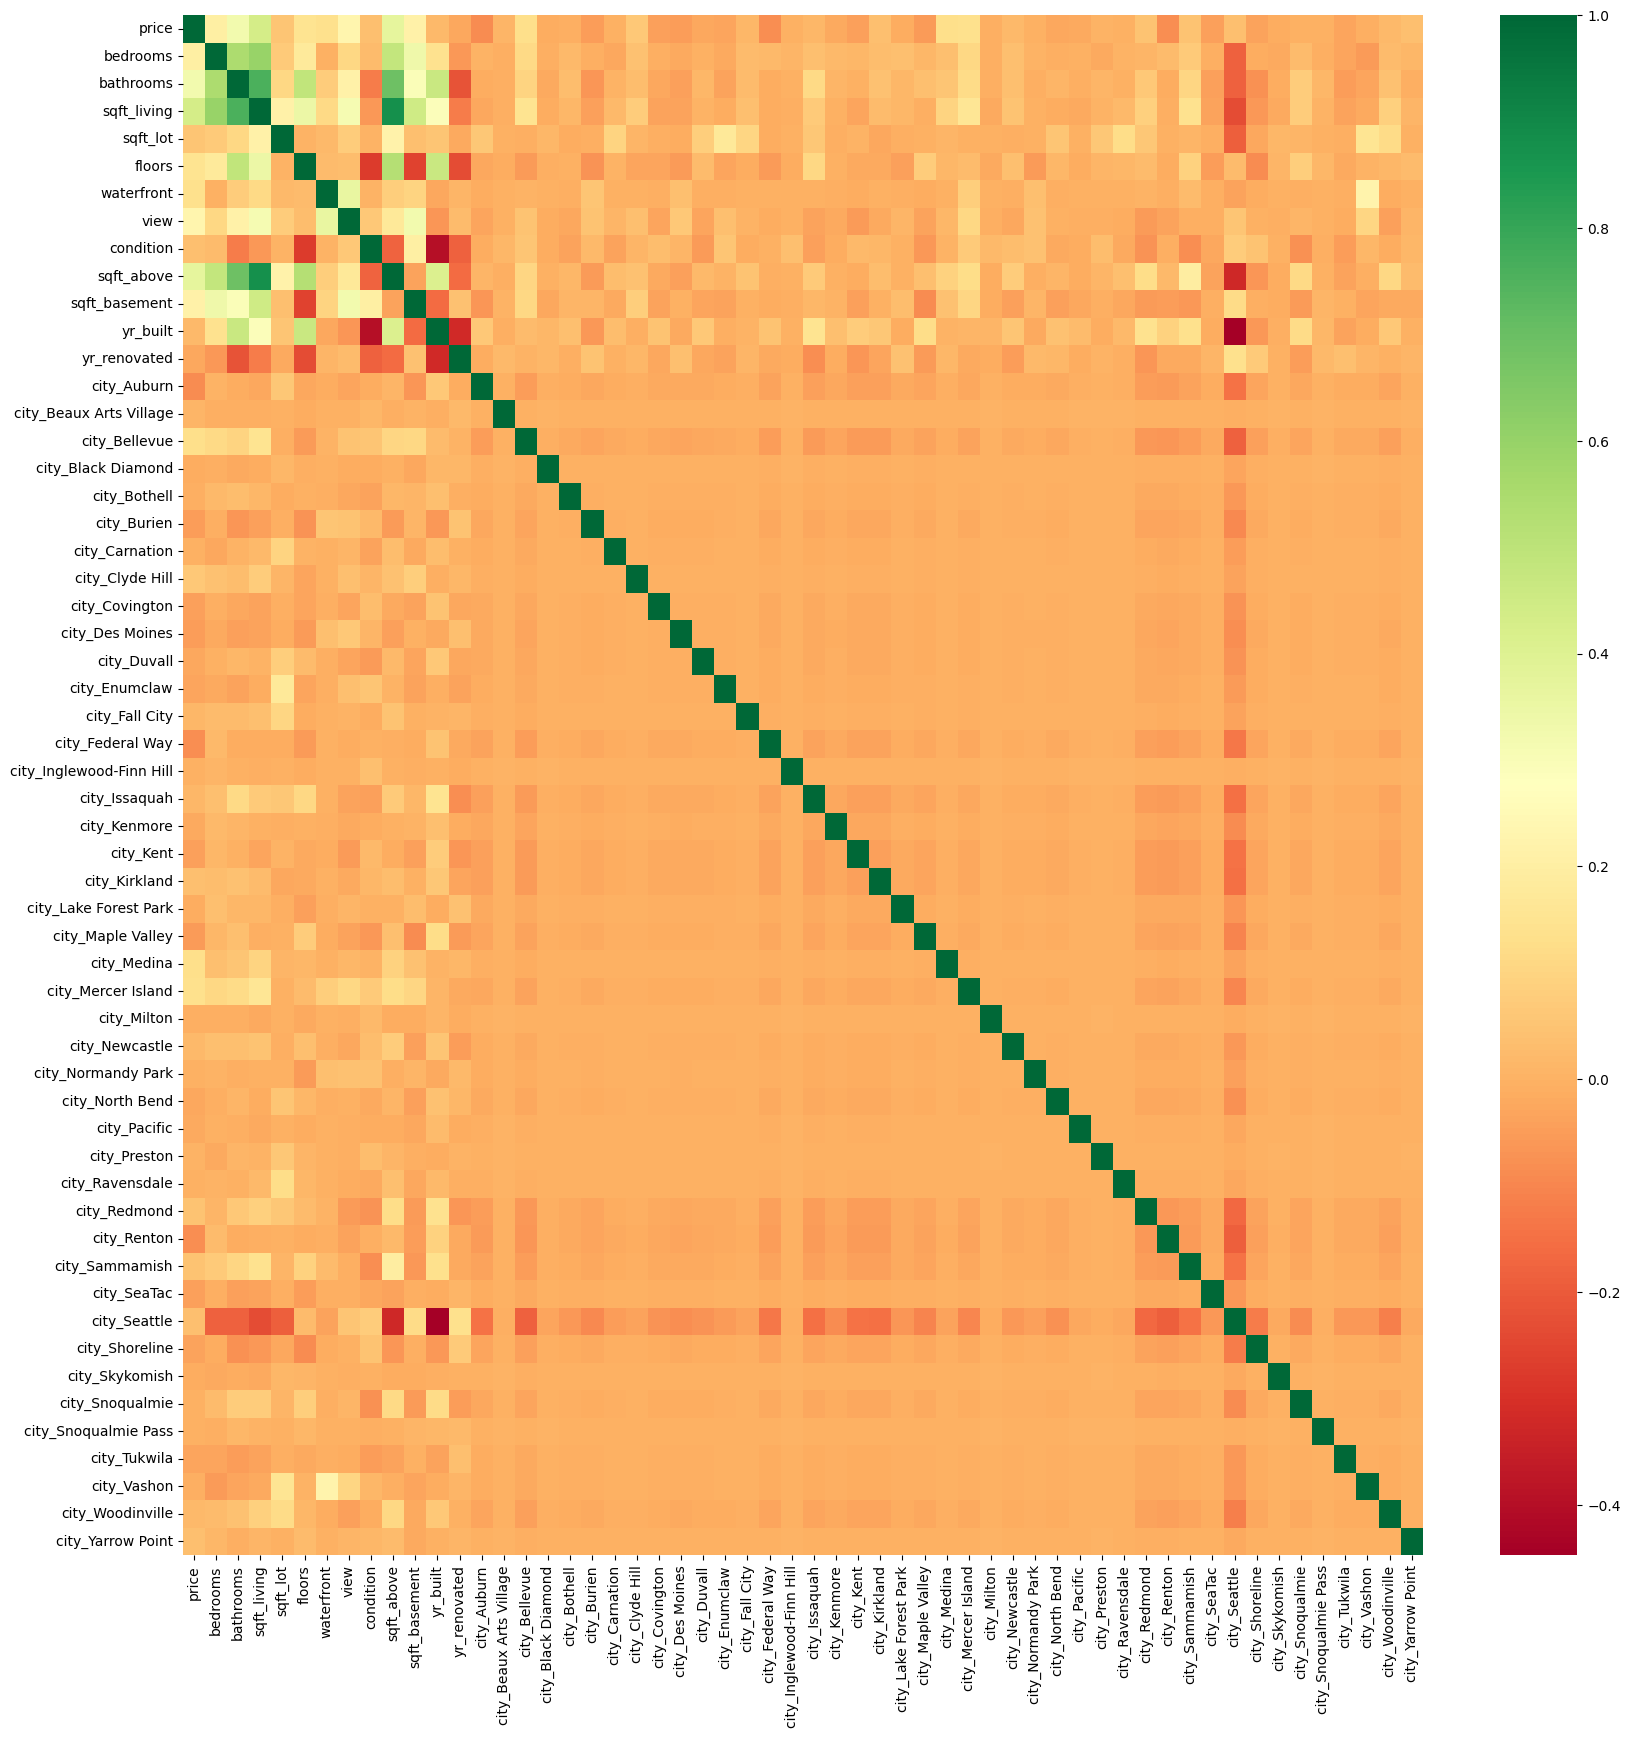

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(), cmap="RdYlGn")
plt.show()

In [ ]:
# Calculate the correlation between columns and 'price', then sort them in descending order
correlation_matrix = df2.corr()['price'].sort_values(ascending=False)
correlation_matrix

price                       1.000000
sqft_living                 0.430410
sqft_above                  0.367570
bathrooms                   0.327110
view                        0.228504
sqft_basement               0.210427
bedrooms                    0.200336
floors                      0.151461
city_Mercer Island          0.140007
waterfront                  0.135648
city_Bellevue               0.134828
city_Medina                 0.129795
city_Clyde Hill             0.066867
sqft_lot                    0.050451
city_Redmond                0.047612
city_Sammamish              0.047604
city_Kirkland               0.036375
city_Seattle                0.035642
condition                   0.034915
city_Yarrow Point           0.033640
yr_built                    0.021857
city_Newcastle              0.017201
city_Woodinville            0.016361
city_Issaquah               0.016139
city_Fall City              0.012220
city_Beaux Arts Village     0.005049
city_Preston                0.000388
c

In [ ]:
num = df.select_dtypes(exclude=['object']).columns
num

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

<Axes: >

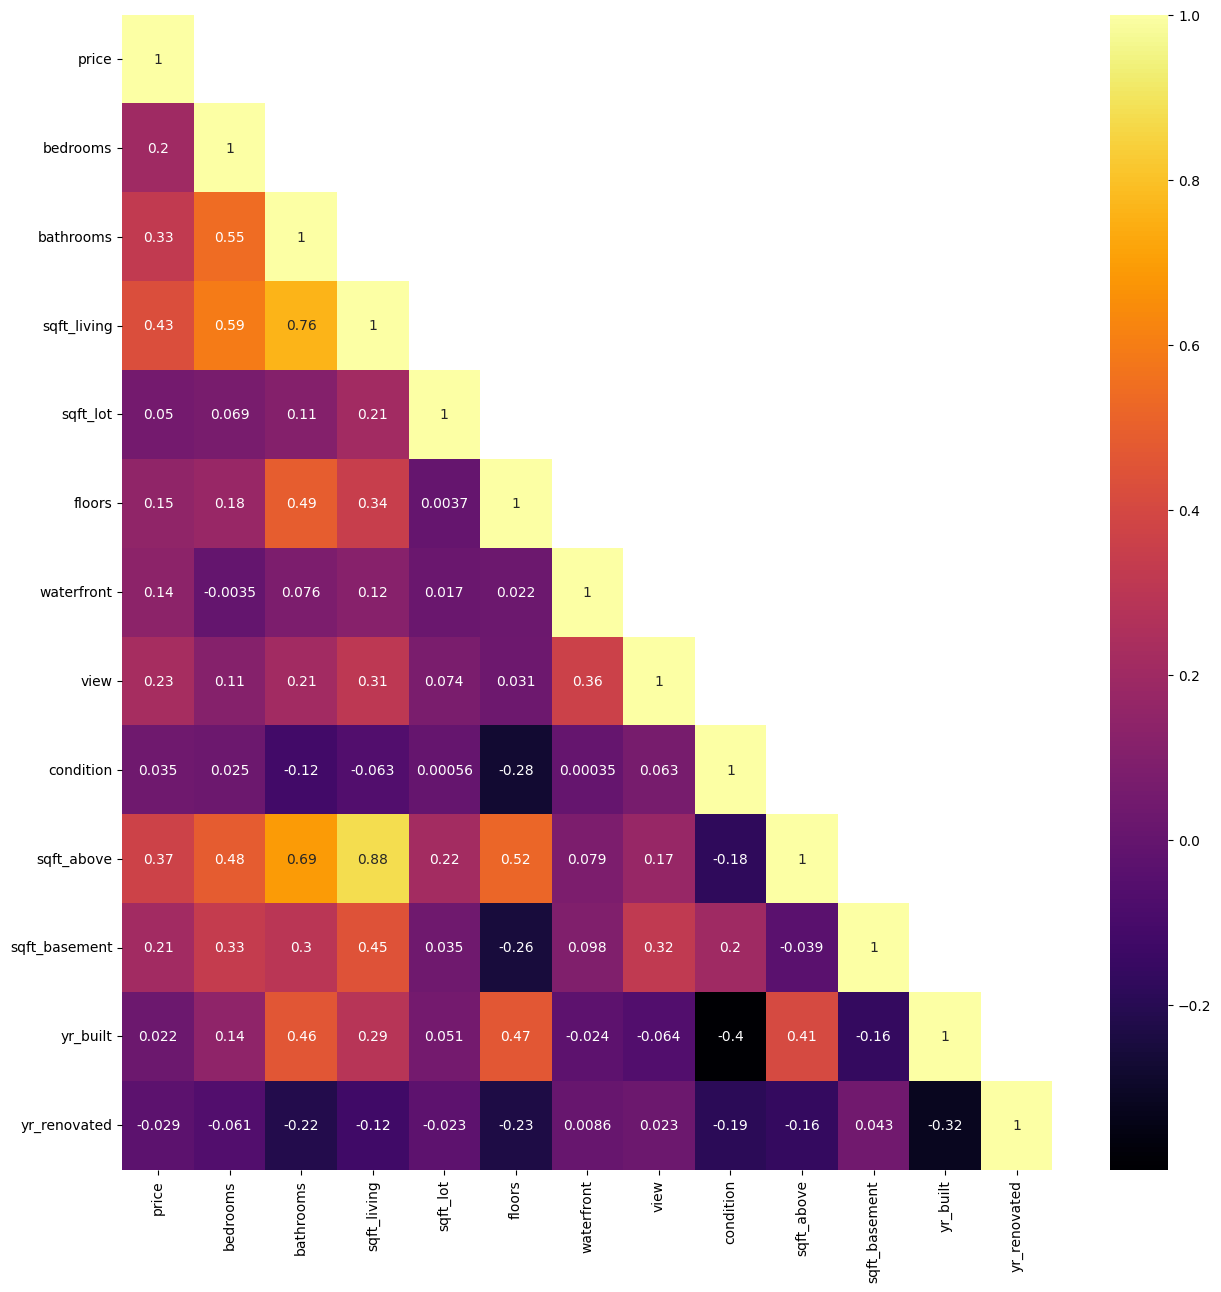

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[num].corr(), annot=True, cmap='inferno', mask=np.triu(df[num].corr(), k=1))

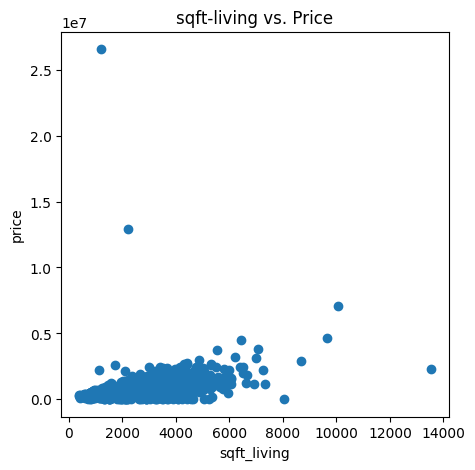

In [ ]:
# Create a scatter plot of enginesize against price
plt.figure(figsize=(5, 5))
plt.scatter(x='sqft_living', y='price', data=df2)
plt.xlabel('sqft_living')
plt.title('sqft-living vs. Price')
plt.ylabel('price')
plt.show()

In [ ]:
# Convert the 'datetime_column' to datetime format
df2['datetime_column'] = pd.to_datetime(df2['date'])

# Extract year and month into separate columns
df2['year'] = df2['datetime_column'].dt.year
df2['month'] = df2['datetime_column'].dt.month

# Display the updated DataFrame
print(df2)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  ...  city_Skykomish  \

In [ ]:
df2 = df2.drop(['datetime_column','date'], axis=1)

In [ ]:
df2.head

<bound method NDFrame.head of              price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  ...  city_Shoreline  \
0          

In [ ]:
# Initialize LabelEncoder
l1 = LabelEncoder()

# Convert object-type columns to numerical using Label Encoding
for i in df2.columns:
    if df2[i].dtype == 'object':
        df2[i] = l1.fit_transform(df2[i])

df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,year,month
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,1,0,0,0,0,0,0,0,2014,5
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,2014,5
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,2014,5
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,2014,5
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,0,0,0,0,0,0,0,2014,7
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,2014,7
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,0,0,0,2014,7
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,0,0,0,0,0,0,0,2014,7


In [ ]:
# Separate input (X) and output (Y) data
X = df2.drop(["price"], axis=1)  # Input data
Y = df2["price"]                  # Output data

In [ ]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
# Print the shapes of the datasets
print("X Train Scaler : ", x_train.shape) # Print shape of x_train
print("X Test Scaler : ",  x_test.shape)  # Print shape of x_test
print("Y Train Scaler : ", y_train.shape) # Print shape of y_train
print("Y Test Scaler : ",  y_test.shape)  # Print shape of y_test

X Train Scaler :  (3680, 57)
X Test Scaler :  (920, 57)
Y Train Scaler :  (3680,)
Y Test Scaler :  (920,)


In [ ]:
# Initialize Min-Max Scaler
scaler_1 = MinMaxScaler()

# Normalize the training input data
x_train = scaler_1.fit_transform(x_train)

# Normalize the test input data
x_test = scaler_1.transform(x_test)

In [ ]:
# Convert y_train and y_test type to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

In [ ]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and relu activation function
model_2.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and relu activation function
model_2.add(Dense(30, activation='relu'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2900      
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4461 (17.43 KB)
Trainable params: 4461 (17.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='adam', loss='mse')
history = model_2.fit(x_train, y_train, validation_split=0.2, epochs=100 ,batch_size=10, verbose=0)

In [ ]:
#Evaluate the model
loss = model_2.evaluate(x_test , y_test)

29/29 [==============================] - 0s 1ms/step - loss: 8.1478e-05


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)

rscore_2

29/29 [==============================] - 0s 1ms/step


0.5704281737140428

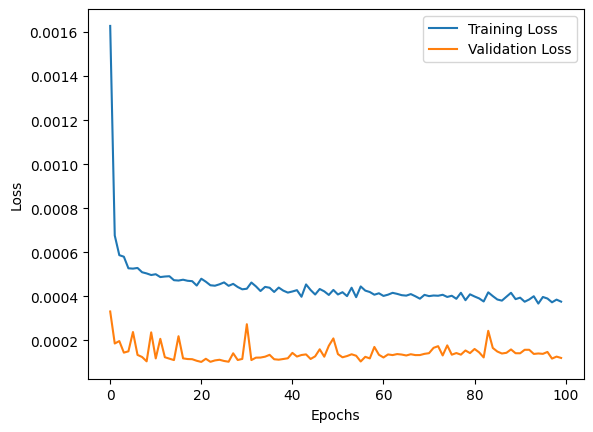

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
model_2 = Sequential()

# Add the first hidden layer with 50 neurons and linear activation function
model_2.add(Dense(50, activation='relu', input_shape=(x_train.shape[1],)))

# Add the second hidden layer with 30 neurons and linear activation function
model_2.add(Dense(30, activation='relu'))

# Add an output layer with 1 neuron and linear activation function
model_2.add(Dense(1, activation='linear'))

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                2900      
                                                                 
 dense_10 (Dense)            (None, 30)                1530      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4461 (17.43 KB)
Trainable params: 4461 (17.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model with stochastic gradient descent optimizer and mean absolute error loss
model_2.compile(optimizer = 'sgd',loss = 'mae')

history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)

29/29 [==============================] - 0s 1ms/step - loss: 0.0086


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
rscore_2

29/29 [==============================] - 0s 1ms/step


0.1630696235488699

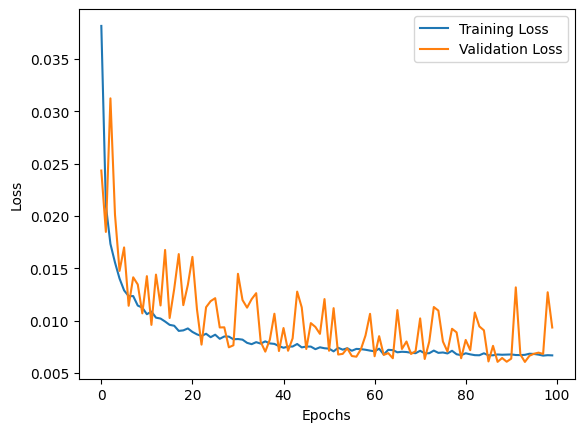

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Compile model with stochastic gradient descent optimizer and mean absolute error loss
model_2.compile(optimizer = 'sgd',loss = 'mae')

history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)

29/29 [==============================] - 0s 2ms/step - loss: 0.0067


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
rscore_2

29/29 [==============================] - 0s 2ms/step


0.4480165065272236

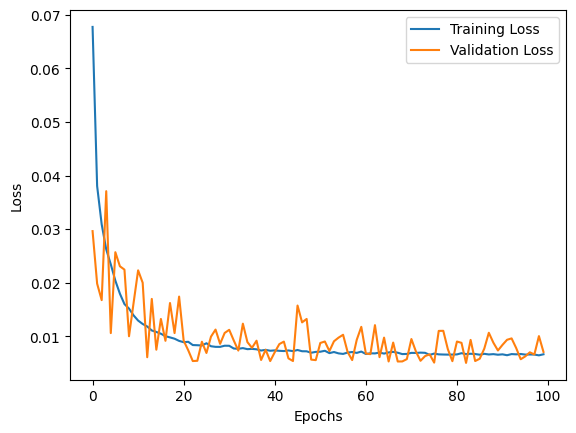

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

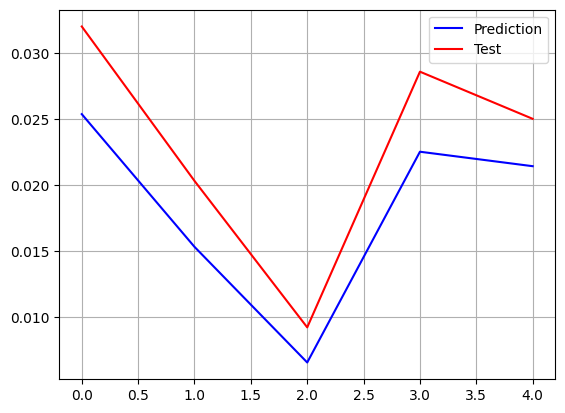

In [ ]:
import random

random_pred = list()
random_test = list()

for i in range(5):
    j = random.randint(0, len(y_pred_2) - 1)  # Generate a random index
    random_pred.append(y_pred_2[j])  # Append y_pred_2 value at the random index j
    random_test.append(y_test[j])  # Append y_test value at the same random index j

# Plot the random predictions and actual test outputs
plt.plot(random_pred, 'b', label='Prediction')  # Blue line for predictions
plt.plot(random_test, 'r', label='Test')        # Red line for actual test outputs

plt.legend()
plt.grid()
plt.show()

In [ ]:
for i in range(5):
    tafavot = random_pred[i] - random_test[i]
    print(tafavot)

[-0.00663961]
[-0.00499544]
[-0.00265931]
[-0.0060627]
[-0.00358737]


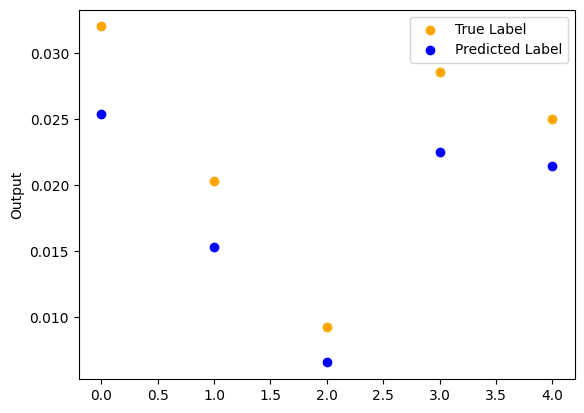

In [ ]:
# Create a scatter plot for true and predicted outputs
plt.scatter(range(len(random_test)), random_test, color="orange")  # True labels in orange
plt.scatter(range(len(random_test)), random_pred, color="blue")  # Predicted labels in blue

plt.legend(['True Label', 'Predicted Label'])
plt.ylabel("Output")
plt.show()